# Import Libraries

In [2]:
!pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 19.0 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110703 sha256=c3743dc1370c5b1fdc2ee5ff7340c4ada6e4f22ccc794014ad7f875997b834a2
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle


In [3]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns
import opendatasets as op

import datetime as datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from contextlib import contextmanager
from time import time
from tqdm import tqdm
import lightgbm as lgbm

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

import datetime
from datetime import date

In [4]:
op.download('https://www.kaggle.com/datasets/hendratno/covid19-indonesia')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fredrikpakpahan
Your Kaggle Key: ········


100%|██████████| 1.22M/1.22M [00:00<00:00, 59.0MB/s]

In [5]:
df = pd.read_csv('./covid19-indonesia/covid_19_indonesia_time_series_all.csv')
df.head(20)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%,1.0,1.0
5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.0,1.0
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,60,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,6000.00%,NaN,NaN
7,3/3/2020,ID-RI,Riau,0,0,0,0,1,0,1,...,0.511648,0.00,0.16,0.00,0.00,0.00,0.00%,100.00%,0.0,1.0
8,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,75,...,-6.204699,0.18,4.15,0.00,1.84,0.18,44.44%,166.67%,1.0,1.0
9,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.0,1.0


In [183]:
df.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [184]:
print('---Location---')
df.Location.unique()

---Location---


array(['DKI Jakarta', 'Indonesia', 'Riau', 'Jawa Barat', 'Banten',
       'Jawa Tengah', 'Sulawesi Tenggara', 'Bali', 'Kalimantan Timur',
       'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Timur',
       'Kepulauan Riau', 'Sulawesi Selatan', 'Jambi', 'Maluku', 'Papua',
       'Maluku Utara', 'Sumatera Selatan', 'Aceh', 'Kalimantan Tengah',
       'Lampung', 'Sulawesi Tengah', 'Sulawesi Utara', 'Sumatera Barat',
       'Papua Barat', 'Kalimantan Utara', 'Sulawesi Barat',
       'Kalimantan Barat', 'Kalimantan Selatan',
       'Kepulauan Bangka Belitung', 'Bengkulu', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Gorontalo'], dtype=object)

# Mengubah tipe string di kolom 'date'

In [6]:
date2=[]
for item in df['Date']:
    item2=item.split('/')
    month=int(item2[0])
    day=int(item2[1])
    year=int(item2[2])
    date2+=[datetime.date(year,month,day)]
df['Date']=date2
df['Date'] = pd.to_datetime(df['Date'])

In [186]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [187]:
## Mengurangi kolom yang tidak diperlukan

data = df.drop(['City or Regency','Location ISO Code',
                'Province','Country','Continent','Island','Time Zone','Special Status',
                'Total Regencies','Total Cities','Total Districts','Total Urban Villages',
                'Total Rural Villages','New Cases per Million','Total Cases per Million',
                'New Deaths per Million','Total Deaths per Million','Case Fatality Rate',
                'Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths', 'Total Deaths per 100rb'],axis = 1)
data = data.fillna(0)
data.head(5)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,664,10846145,16334.31,106.836118,-6.204699
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,664,10846145,16334.31,106.836118,-6.204699
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,Country,1916907,265185520,138.34,113.921327,-0.789275
3,2020-03-02,Riau,1,0,0,1,1,0,1,0,Province,87024,6074100,69.80,101.805109,0.511648
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,664,10846145,16334.31,106.836118,-6.204699


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                31822 non-null  datetime64[ns]
 1   Location            31822 non-null  object        
 2   New Cases           31822 non-null  int64         
 3   New Deaths          31822 non-null  int64         
 4   New Recovered       31822 non-null  int64         
 5   New Active Cases    31822 non-null  int64         
 6   Total Cases         31822 non-null  int64         
 7   Total Deaths        31822 non-null  int64         
 8   Total Recovered     31822 non-null  int64         
 9   Total Active Cases  31822 non-null  int64         
 10  Location Level      31822 non-null  object        
 11  Area (km2)          31822 non-null  int64         
 12  Population          31822 non-null  int64         
 13  Population Density  31822 non-null  float64   

In [189]:
## Menghapus data yang sama dengan patokan 'Location'

newest = data.drop_duplicates(subset='Location', keep="last")
newest.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
31759,2022-09-14,Gorontalo,1,0,0,1,13951,487,13433,31,Province,11257,1180651,104.88,122.376058,0.687003
31780,2022-09-14,Sulawesi Barat,1,0,0,1,15601,394,15201,6,Province,16787,1559984,92.93,119.345019,-2.461746
31788,2022-09-15,Aceh,20,0,1,19,44038,2223,41713,102,Province,57956,5247257,90.54,96.910522,4.225615
31789,2022-09-15,Bali,38,1,6,31,166831,4731,161629,471,Province,5780,4216171,729.43,115.131714,-8.369472
31790,2022-09-15,Banten,240,0,32,208,333875,2950,328482,2443,Province,9663,10722374,1109.64,106.109004,-6.456736


In [190]:
## Menyortir data dengan patokan 'New Deaths' berdasarkan lokasi

newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
31792,2022-09-15,DKI Jakarta,1116,0,58,1058,1412511,15513,1386134,10864,Province,664,10846145,16334.31,106.836118,-6.204699
31796,2022-09-15,Jawa Barat,492,0,79,413,1173731,15937,1144358,13436,Province,35378,45161325,1276.55,107.603708,-6.920432
31797,2022-09-15,Jawa Tengah,108,0,2,106,636409,33489,601517,1403,Province,32801,36364072,1108.64,110.201115,-7.259097
31798,2022-09-15,Jawa Timur,268,0,43,225,601545,31764,569003,778,Province,47803,40479023,846.78,112.732941,-7.723346
31790,2022-09-15,Banten,240,0,32,208,333875,2950,328482,2443,Province,9663,10722374,1109.64,106.109004,-6.456736
31793,2022-09-15,Daerah Istimewa Yogyakarta,27,0,0,27,224307,5928,217712,667,Province,3133,3631015,1158.90,110.444878,-7.894502
31802,2022-09-15,Kalimantan Timur,26,0,9,17,209017,5726,203022,269,Province,129067,3552191,27.52,116.468440,0.453858
31789,2022-09-15,Bali,38,1,6,31,166831,4731,161629,471,Province,5780,4216171,729.43,115.131714,-8.369472
31820,2022-09-15,Sumatera Utara,50,0,5,45,158866,3288,154924,654,Province,72981,14874889,203.82,99.051964,2.191894
31813,2022-09-15,Riau,19,0,1,18,152648,4452,147973,223,Province,87024,6074100,69.80,101.805109,0.511648


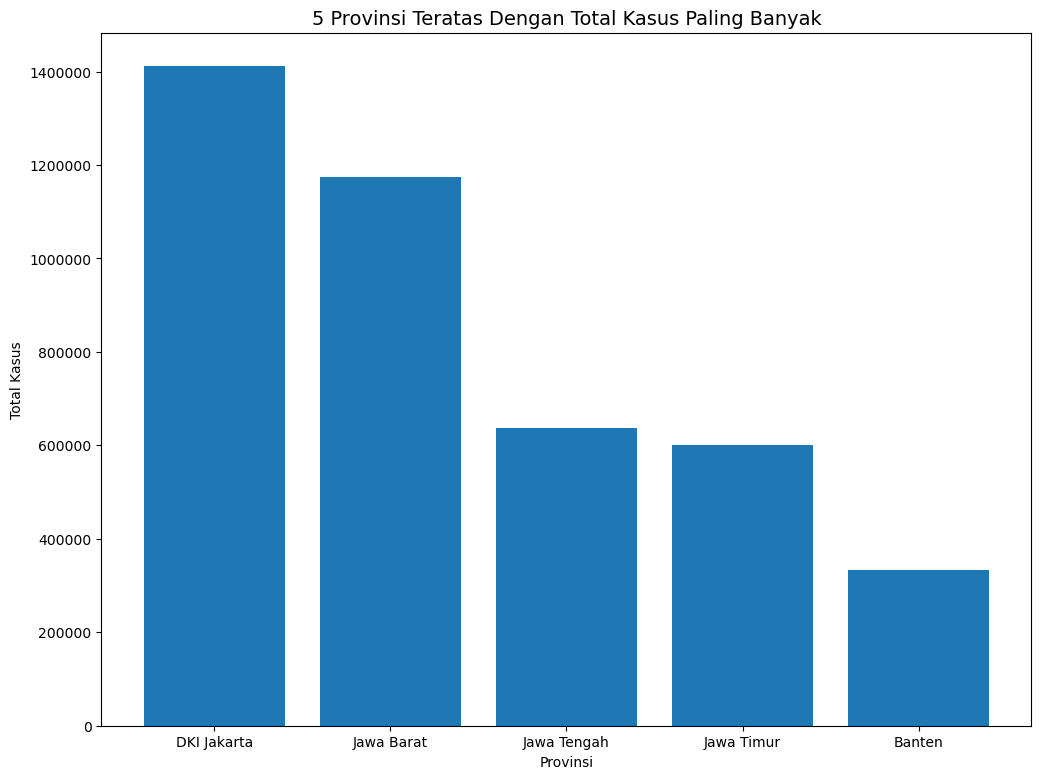

In [191]:
# Menampilkan 5 provinsi dengan kasus terbanyak

# Buat plot bar
plt.figure(figsize=(12, 9))
plt.bar(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Location'].values[:5],
        newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Total Cases'].values[:5])

# Beri judul dan label pada plot
plt.title('5 Provinsi Teratas Dengan Total Kasus Paling Banyak', fontsize=14)
plt.xlabel('Provinsi')
plt.ylabel('Total Kasus')  # Menambahkan label sumbu y

# Atur formatter pada sumbu y
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FormatStrFormatter('%d'))

# Tampilkan plot
plt.show()

In [192]:
## Presentase terbanyak kasus

print('Persentase Kenaikan Kasus Baru dari Tanggal 9-15 sebanyak', (newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Total Cases'].values[:2][0] - newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Total Cases'].values[:2][1])/newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Total Cases'].values[:2][0] * 100)

Persentase Kenaikan Kasus Baru dari Tanggal 9-15 sebanyak 16.904647114252562


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


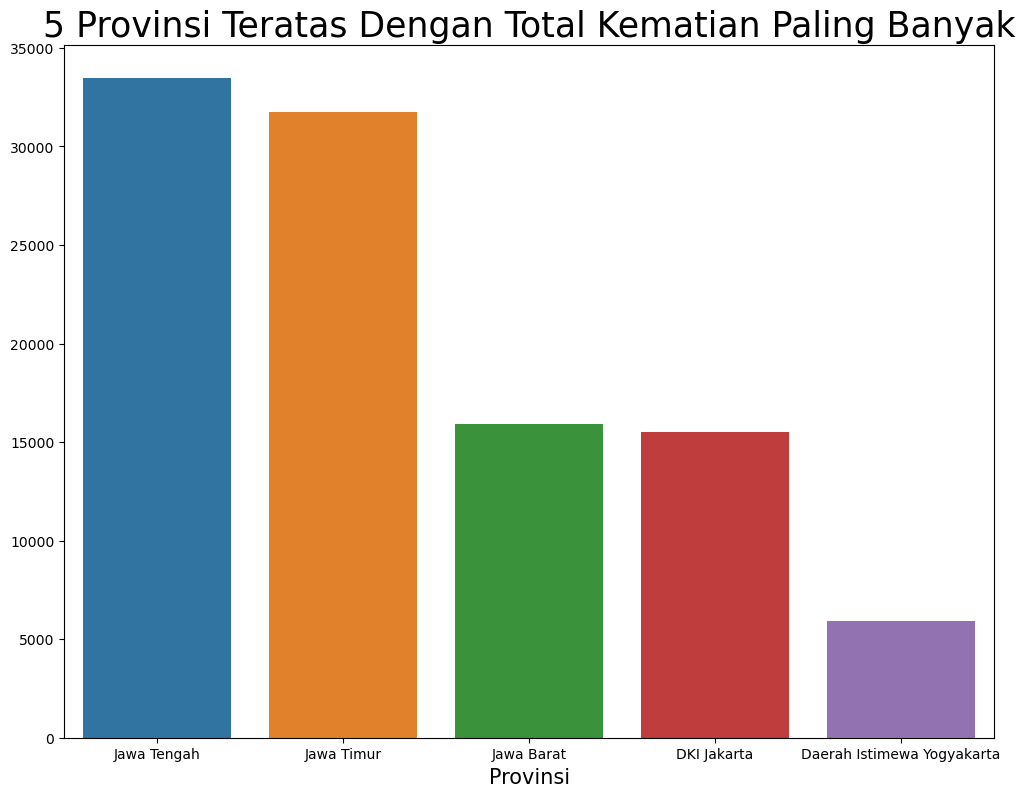

In [193]:
## Provinsi dengan angka kematian terbanyak

plt.figure(figsize=(12,9))

sns.barplot(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Location'].values[:5],  newest[newest.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Total Deaths'].values[:5])
plt.title('5 Provinsi Teratas Dengan Total Kematian Paling Banyak', fontsize=25)
plt.xlabel('Provinsi', fontsize=15)
plt.show()

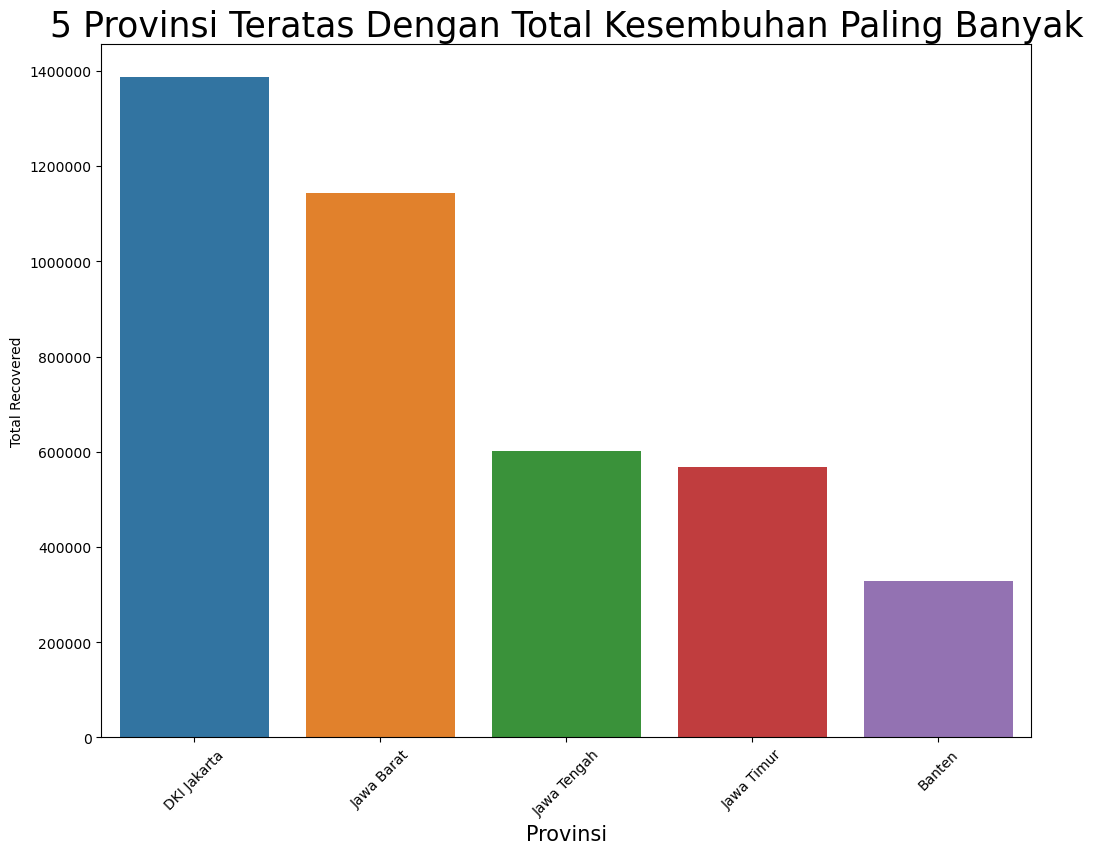

In [194]:
# Kesembuhan terbanyak

import matplotlib.ticker as ticker

plt.figure(figsize=(12, 9))
sns.barplot(
    x='Location',
    y='Total Recovered',
    data=newest[newest.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)[:5]
)
plt.title('5 Provinsi Teratas Dengan Total Kesembuhan Paling Banyak', fontsize=25)
plt.xlabel('Provinsi', fontsize=15)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.xticks(rotation=45)  # Mengatur rotasi label sumbu x jika diperlukan
plt.show()

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


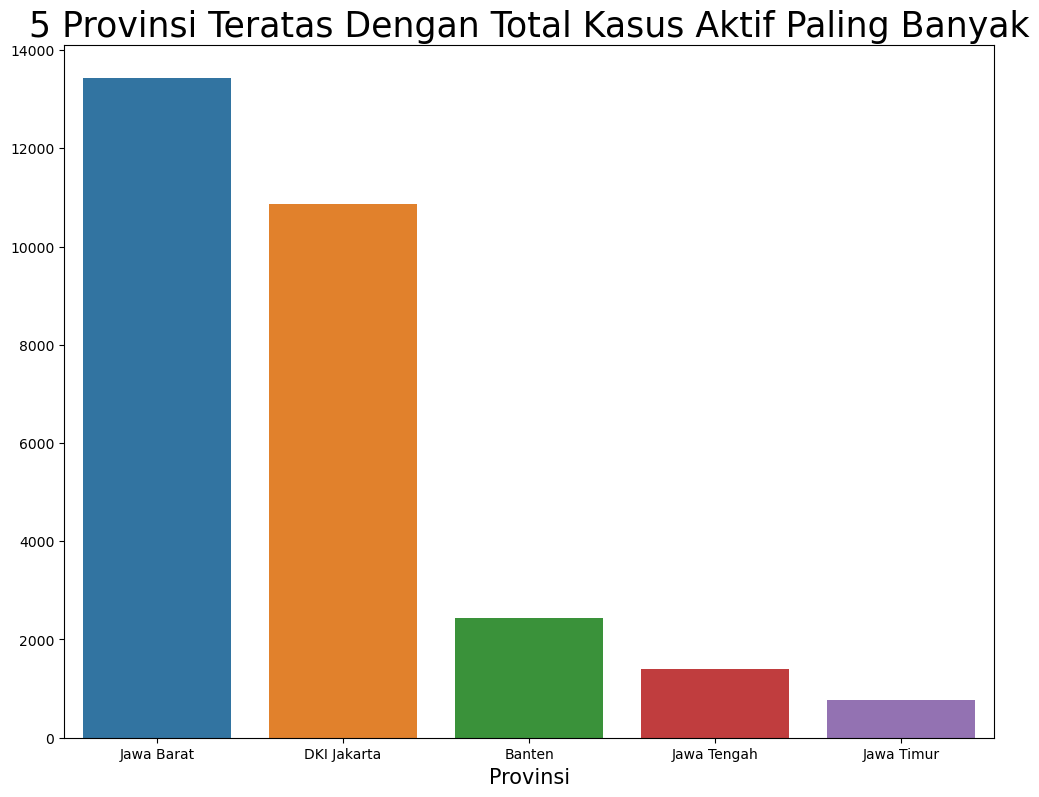

In [195]:
## Provinsi dengan angka kasus aktif paling banyak

plt.figure(figsize=(12,9))
sns.barplot(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)['Location'].values[:5],  newest[newest.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)['Total Active Cases'].values[:5])
plt.title('5 Provinsi Teratas Dengan Total Kasus Aktif Paling Banyak', fontsize=25)
plt.xlabel('Provinsi', fontsize=15)
plt.show()

In [196]:
jakarta = data[data.Location == 'DKI Jakarta'].tail(7).copy()
jakarta = data[data.Location == 'DKI Jakarta'].tail(7).copy()
jabar = data[data.Location == 'Jawa Barat'].tail(7).copy()
banten = data[data.Location == 'Banten'].tail(7).copy()
jateng = data[data.Location == 'Jawa Tengah'].tail(7).copy()
jatim = data[data.Location == 'Jawa Timur'].tail(7).copy()
jakarta

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
31582,2022-09-09,DKI Jakarta,1166,2,2146,-982,1408154,15505,1381349,11300,Province,664,10846145,16334.31,106.836118,-6.204699
31617,2022-09-10,DKI Jakarta,1125,1,1612,-488,1409279,15506,1382961,10812,Province,664,10846145,16334.31,106.836118,-6.204699
31652,2022-09-11,DKI Jakarta,855,3,1429,-577,1410134,15509,1384390,10235,Province,664,10846145,16334.31,106.836118,-6.204699
31687,2022-09-12,DKI Jakarta,17,3,1350,-1336,1410151,15512,1385740,8899,Province,664,10846145,16334.31,106.836118,-6.204699
31722,2022-09-13,DKI Jakarta,16,0,313,-297,1410167,15512,1386053,8602,Province,664,10846145,16334.31,106.836118,-6.204699
31757,2022-09-14,DKI Jakarta,1228,1,23,1204,1411395,15513,1386076,9806,Province,664,10846145,16334.31,106.836118,-6.204699
31792,2022-09-15,DKI Jakarta,1116,0,58,1058,1412511,15513,1386134,10864,Province,664,10846145,16334.31,106.836118,-6.204699


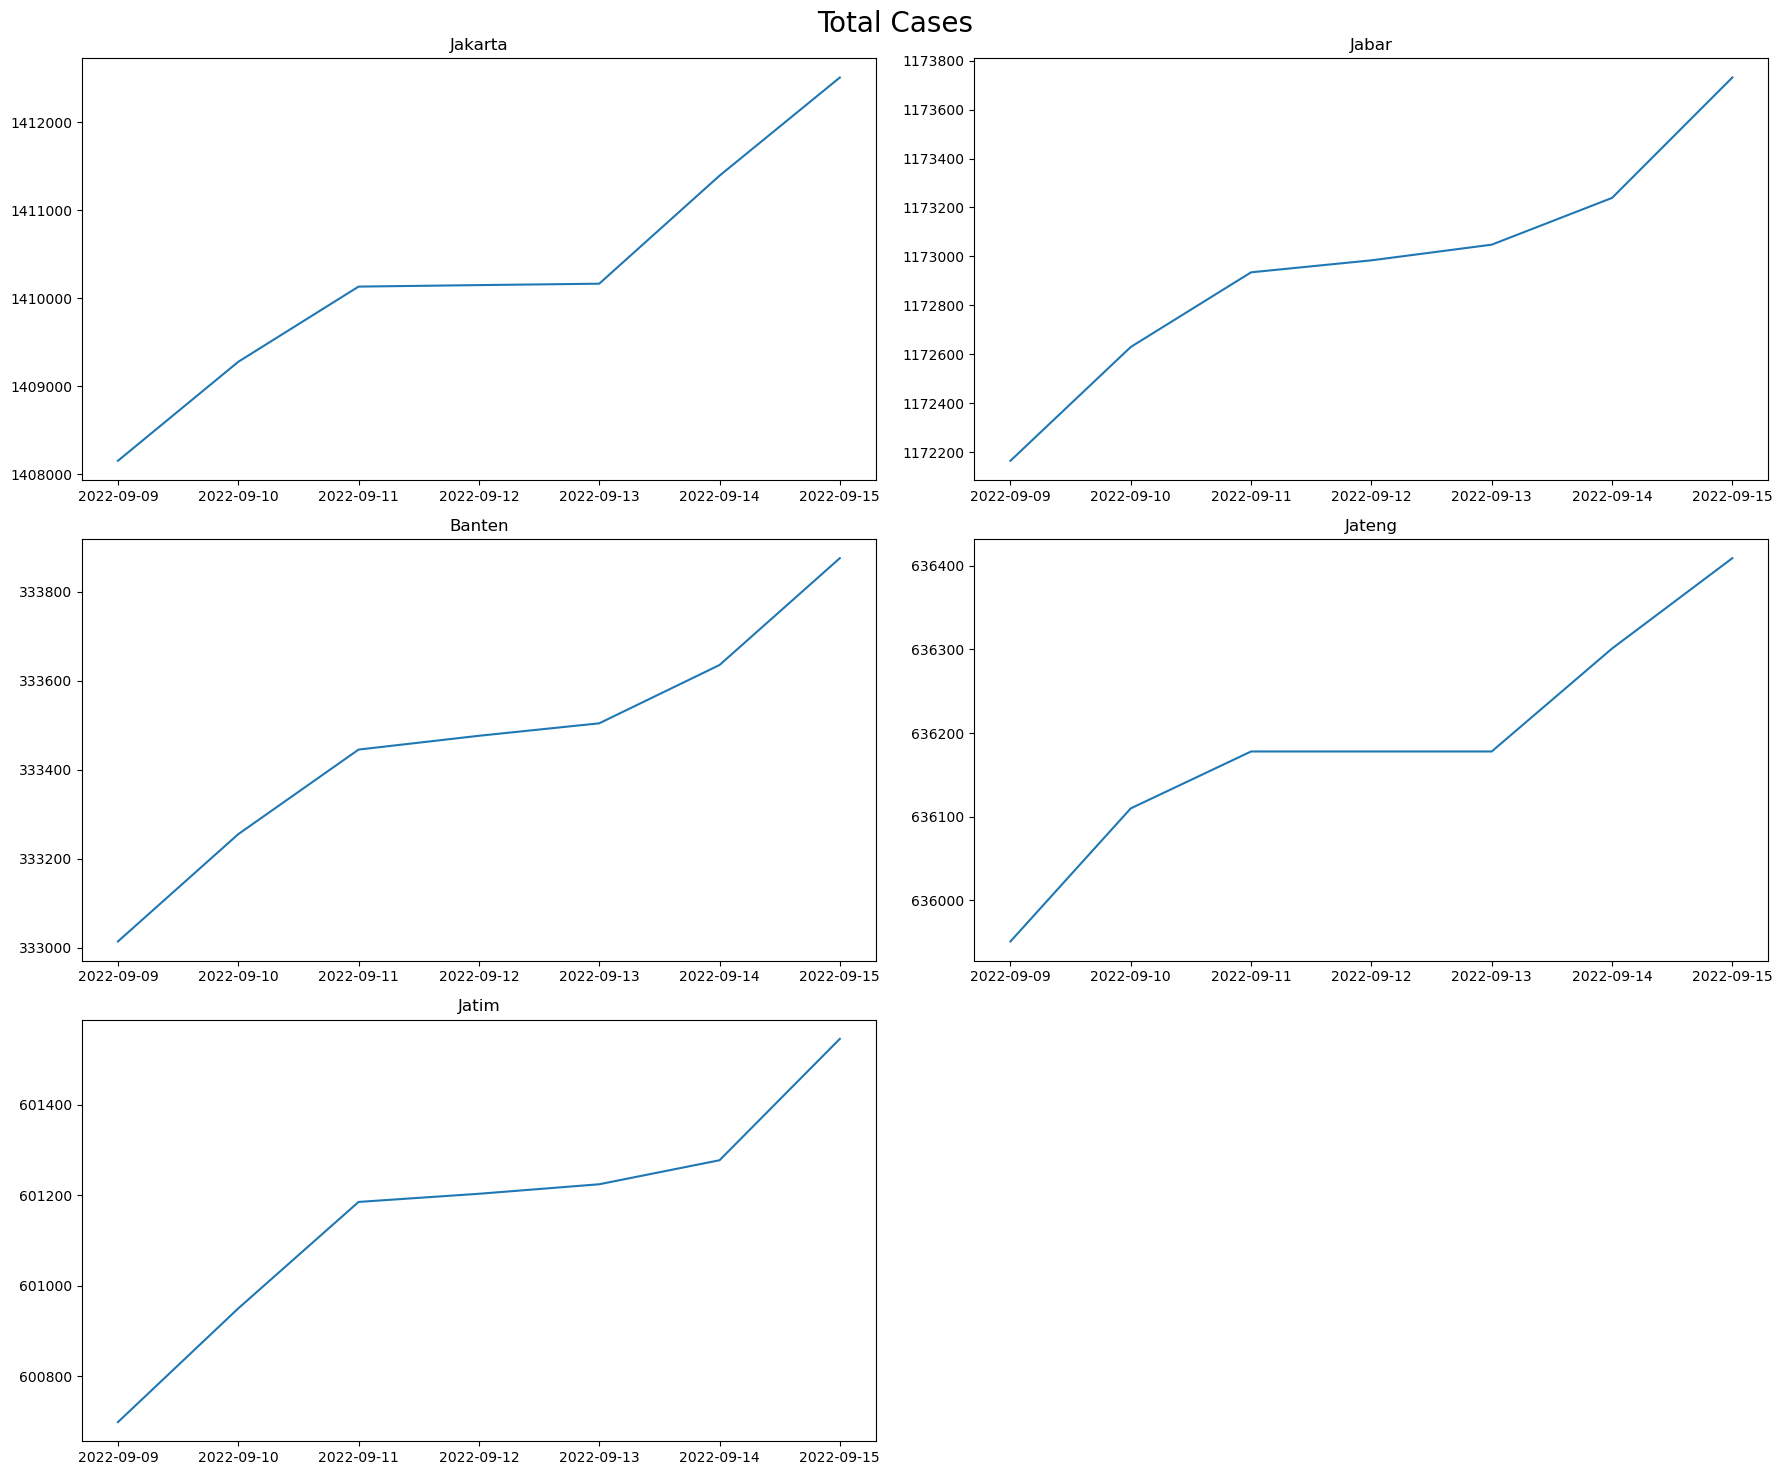

In [197]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

# Plot pada setiap subplot
axes[0, 0].plot(jakarta['Date'].values, jakarta['Total Cases'].values)
axes[0, 0].set_title('Jakarta')
axes[0, 1].plot(jabar['Date'].values, jabar['Total Cases'].values)
axes[0, 1].set_title('Jabar')
axes[1, 0].plot(banten['Date'].values, banten['Total Cases'].values)
axes[1, 0].set_title('Banten')
axes[1, 1].plot(jateng['Date'].values, jateng['Total Cases'].values)
axes[1, 1].set_title('Jateng')
axes[2, 0].plot(jatim['Date'].values, jatim['Total Cases'].values)
axes[2, 0].set_title('Jatim')

# Hapus subplot yang tidak digunakan
axes[2, 1].axis('off')

axes[0,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
axes[0,1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
axes[1,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
axes[1,1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
axes[2,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.suptitle('Total Cases', fontsize=20)
plt.tight_layout()
plt.show()

In [198]:
print('Persentase Kenaikan dari Tanggal 13-14 sebanyak', (jakarta['New Cases'].values[4:][1]- jakarta['New Cases'].values[4:][0]) / jakarta['New Cases'].values[4:][0] * 100)

Persentase Kenaikan dari Tanggal 13-14 sebanyak 7575.0


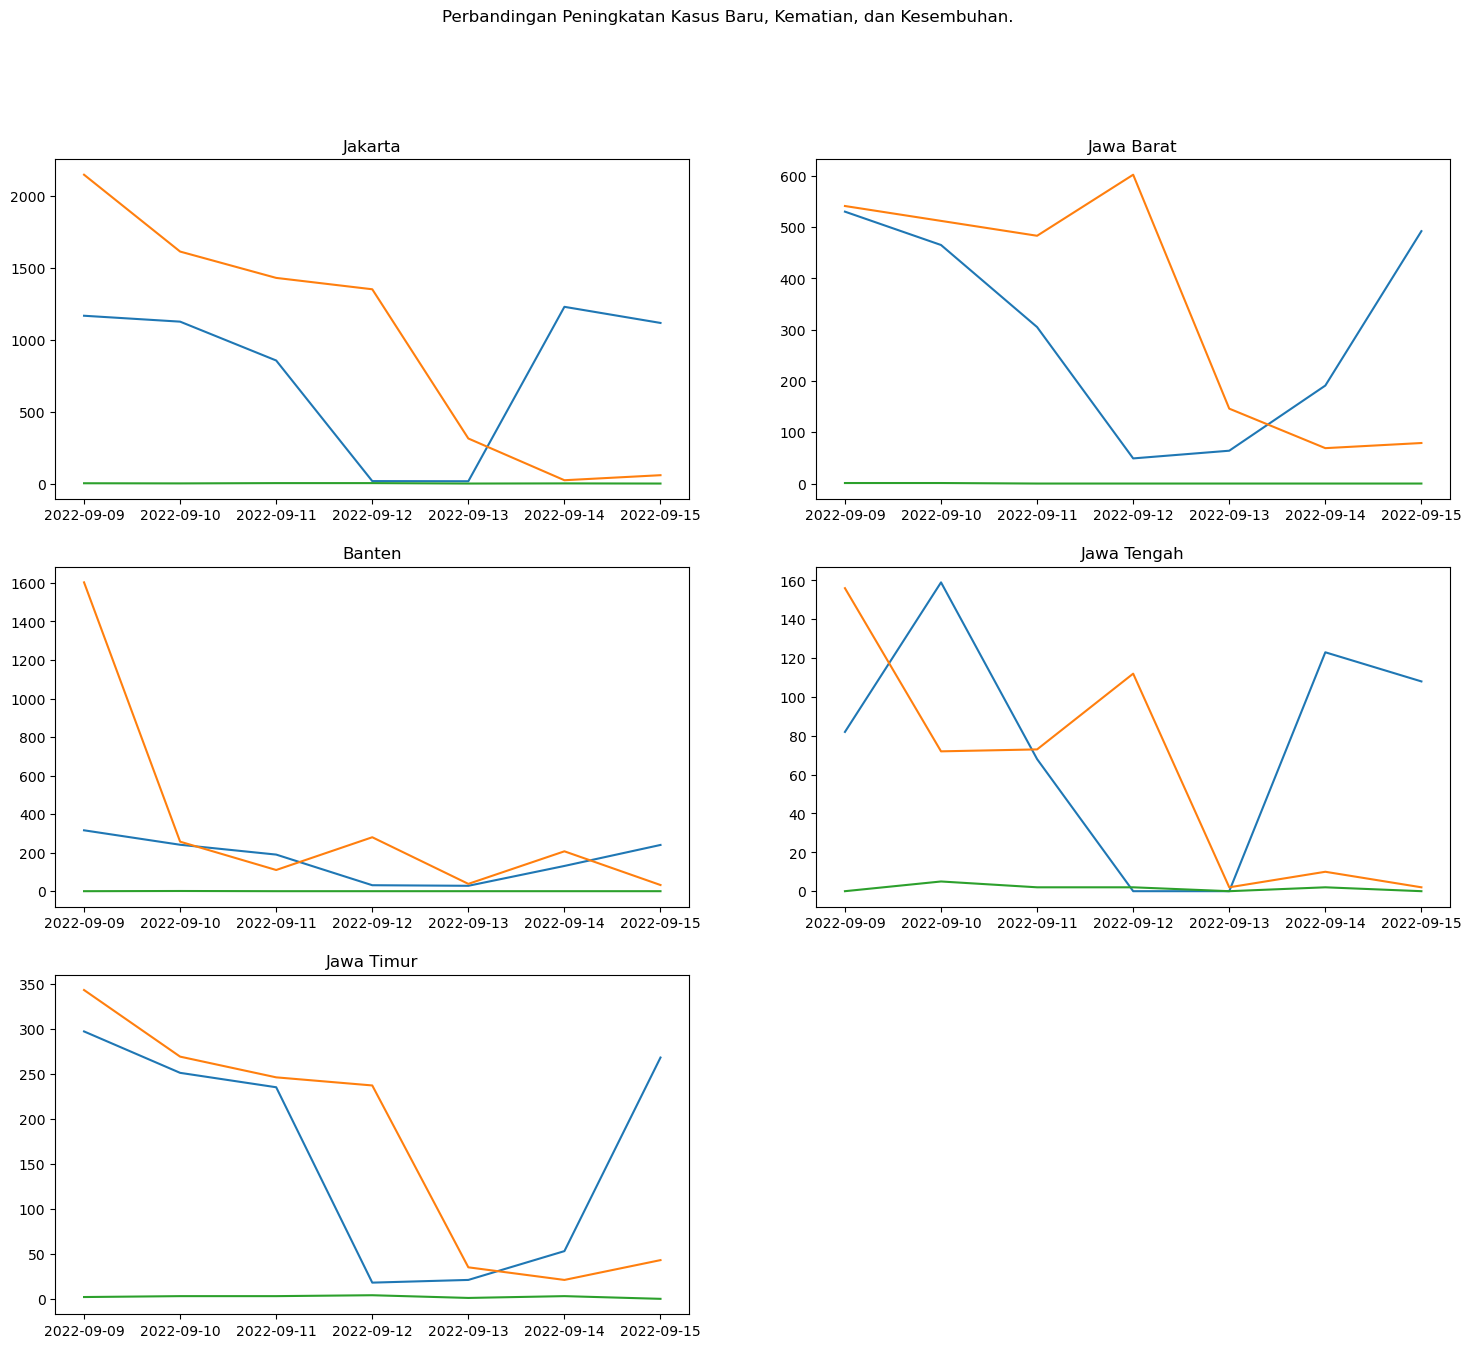

In [199]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

axes[0,0].plot(jakarta['Date'].values ,jakarta['New Cases'].values, label='Cases')
axes[0,0].plot(jakarta['Date'].values, jakarta['New Recovered'].values, label = 'Recover')
axes[0,0].plot(jakarta['Date'].values, jakarta['New Deaths'].values, label = 'Death')
axes[0,0].set_title('Jakarta')
axes[0,1].plot(jabar['Date'].values ,jabar['New Cases'].values, label='Cases')
axes[0,1].plot(jabar['Date'].values, jabar['New Recovered'].values, label = 'Recover')
axes[0,1].plot(jabar['Date'].values, jabar['New Deaths'].values, label = 'Death')
axes[0,1].set_title('Jawa Barat')
axes[1,0].plot(banten['Date'].values ,banten['New Cases'].values, label='Cases')
axes[1,0].plot(banten['Date'].values, banten['New Recovered'].values, label = 'Recover')
axes[1,0].plot(banten['Date'].values, banten['New Deaths'].values, label = 'Death')
axes[1,0].set_title('Banten')
axes[1,1].plot(jateng['Date'].values ,jateng['New Cases'].values, label='Cases')
axes[1,1].plot(jateng['Date'].values, jateng['New Recovered'].values, label = 'Recover')
axes[1,1].plot(jateng['Date'].values, jateng['New Deaths'].values, label = 'Death')
axes[1,1].set_title('Jawa Tengah')
axes[2,0].plot(jatim['Date'].values ,jatim['New Cases'].values, label='Cases')
axes[2,0].plot(jatim['Date'].values, jatim['New Recovered'].values, label = 'Recover')
axes[2,0].plot(jatim['Date'].values, jatim['New Deaths'].values, label = 'Death')
axes[2,0].set_title('Jawa Timur')

axes[2, 1].axis('off')

axes[0,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
axes[0,1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
axes[1,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
axes[1,1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
axes[2,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.suptitle('Perbandingan Peningkatan Kasus Baru, Kematian, dan Kesembuhan. ')
plt.show()

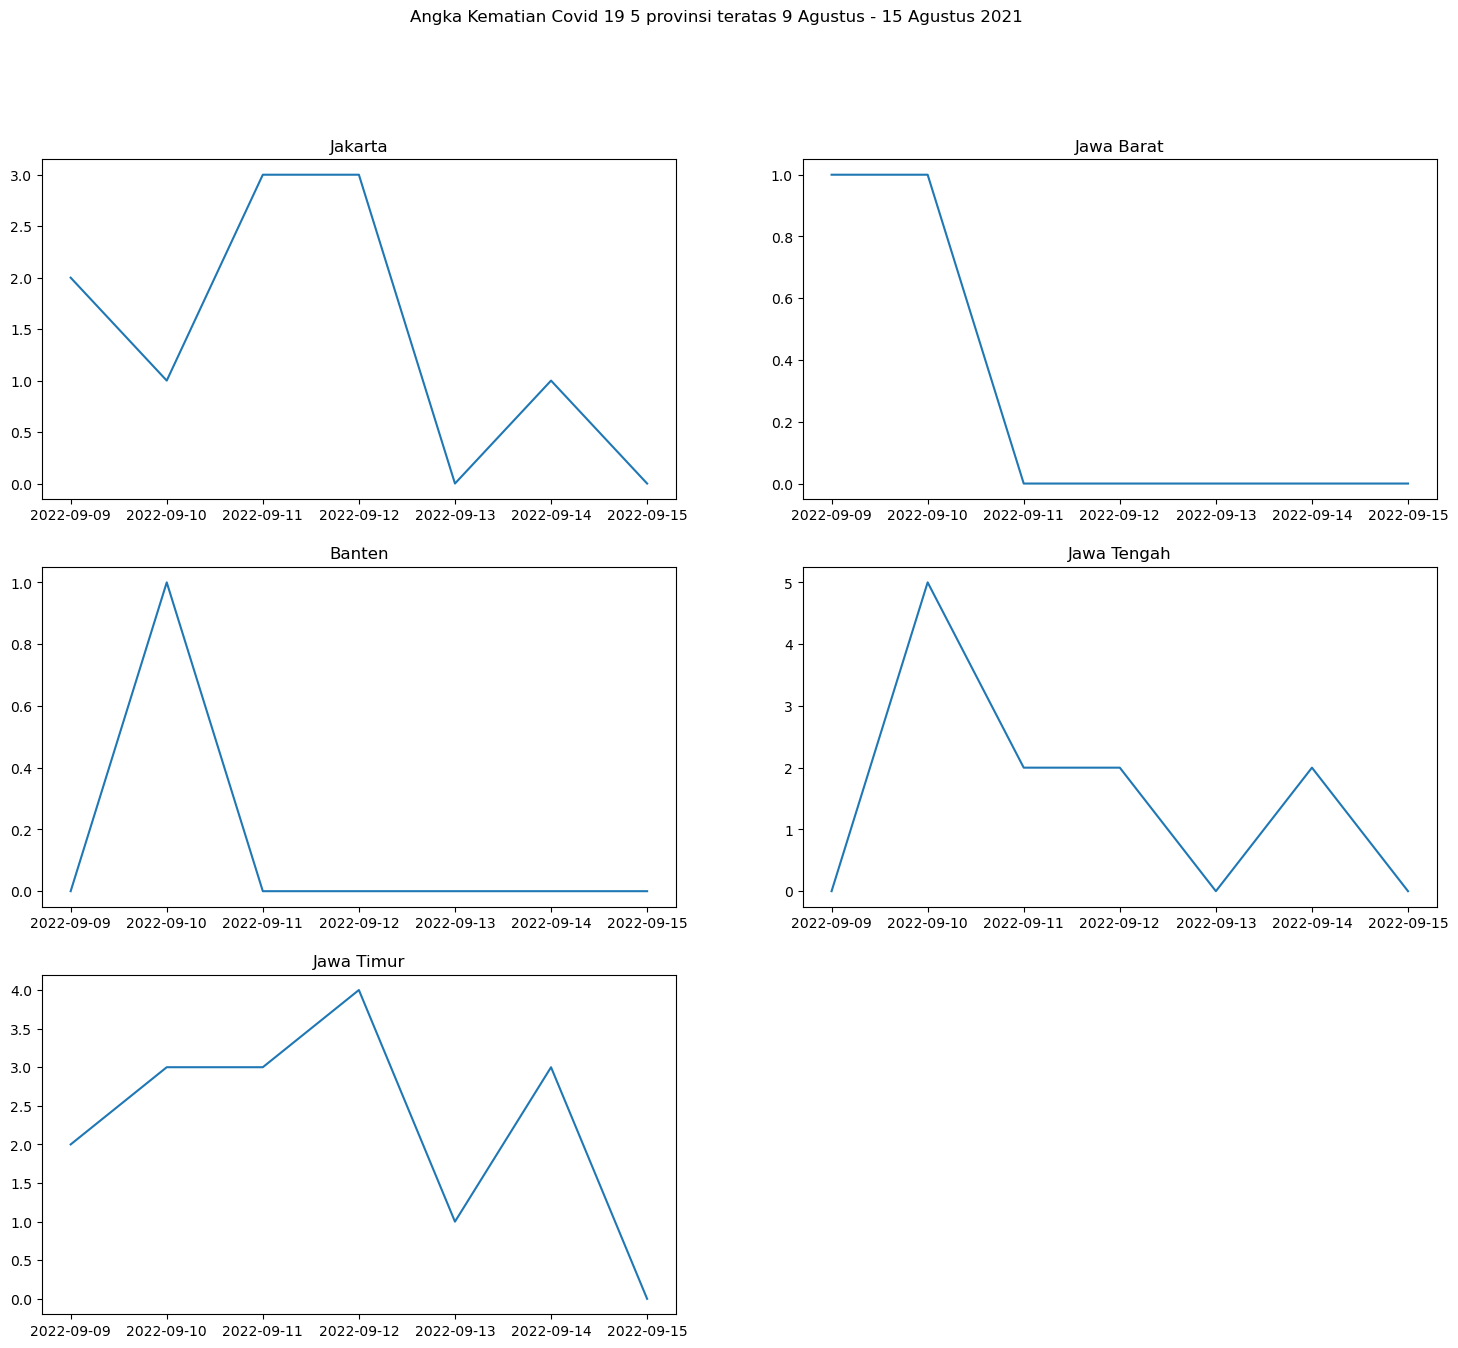

In [200]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

axes[0,0].plot(jakarta['Date'].values, jakarta['New Deaths'].values, label = 'Death')
axes[0,0].set_title('Jakarta')
axes[0,1].plot(jabar['Date'].values, jabar['New Deaths'].values, label = 'Death')
axes[0,1].set_title('Jawa Barat')
axes[1,0].plot(banten['Date'].values, banten['New Deaths'].values, label = 'Death')
axes[1,0].set_title('Banten')
axes[1,1].plot(jateng['Date'].values, jateng['New Deaths'].values, label = 'Death')
axes[1,1].set_title('Jawa Tengah')
axes[2,0].plot(jatim['Date'].values, jatim['New Deaths'].values, label = 'Death')
axes[2,0].set_title('Jawa Timur')

axes[2, 1].axis('off')

plt.suptitle('Angka Kematian Covid 19 5 provinsi teratas 9 Agustus - 15 Agustus 2021')
plt.show()

In [201]:
jatim = data[data.Location == 'Jawa Timur'].tail(7).copy()
jatim

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
31589,2022-09-09,Jawa Timur,297,2,343,-48,600699,31750,568152,797,Province,47803,40479023,846.78,112.732941,-7.723346
31624,2022-09-10,Jawa Timur,251,3,269,-21,600950,31753,568421,776,Province,47803,40479023,846.78,112.732941,-7.723346
31659,2022-09-11,Jawa Timur,235,3,246,-14,601185,31756,568667,762,Province,47803,40479023,846.78,112.732941,-7.723346
31694,2022-09-12,Jawa Timur,18,4,237,-223,601203,31760,568904,539,Province,47803,40479023,846.78,112.732941,-7.723346
31729,2022-09-13,Jawa Timur,21,1,35,-15,601224,31761,568939,524,Province,47803,40479023,846.78,112.732941,-7.723346
31764,2022-09-14,Jawa Timur,53,3,21,29,601277,31764,568960,553,Province,47803,40479023,846.78,112.732941,-7.723346
31798,2022-09-15,Jawa Timur,268,0,43,225,601545,31764,569003,778,Province,47803,40479023,846.78,112.732941,-7.723346


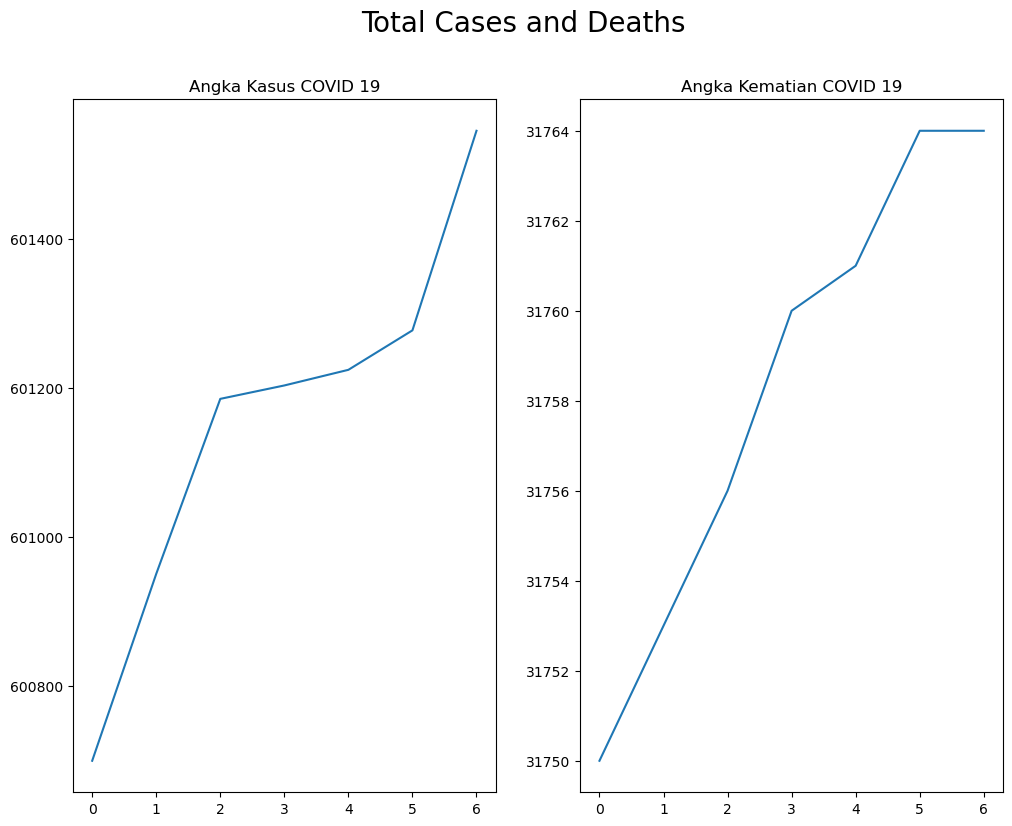

In [202]:
fig,(ax1,ax2) =  plt.subplots(1,2,figsize=(12,9))
ax1.plot(range(7), jatim['Total Cases'].values)
ax1.set_title('Angka Kasus COVID 19')
ax2.plot(range(7), jatim['Total Deaths'].values)
ax2.set_title('Angka Kematian COVID 19')
plt.suptitle('Total Cases and Deaths', fontsize=20)
plt.show()

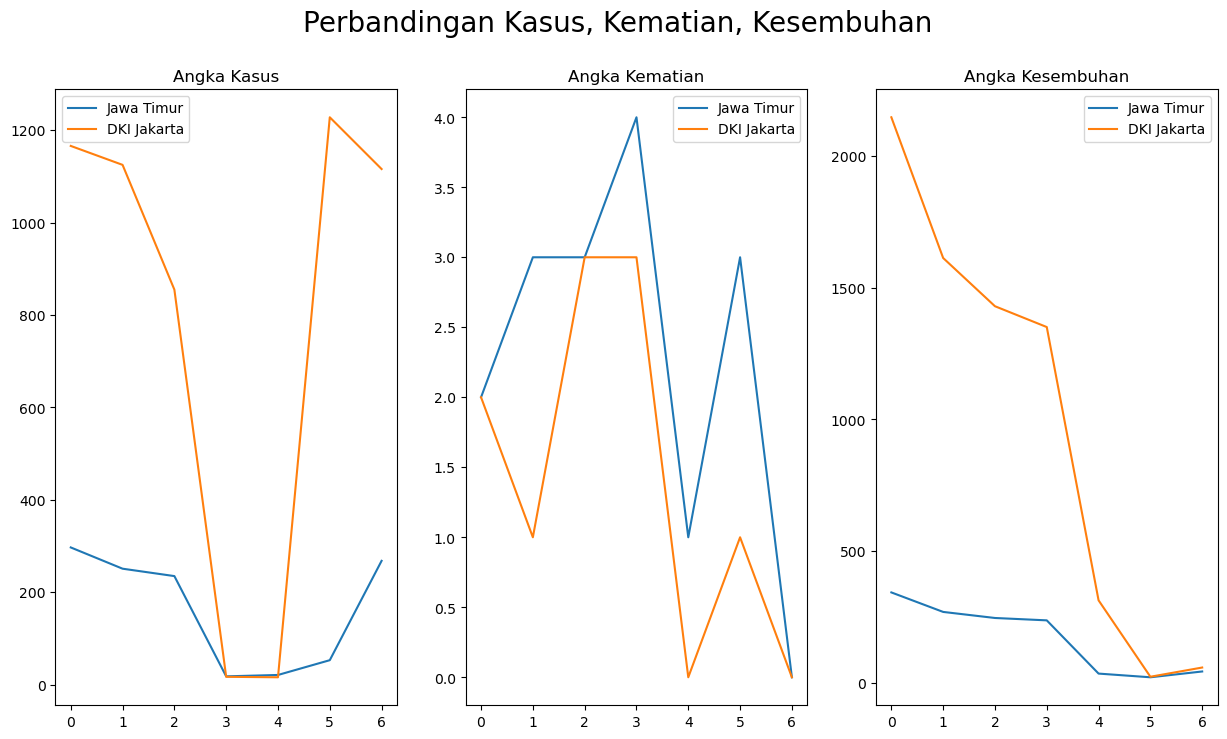

In [203]:
fig, ax = plt.subplots(1,3, figsize=(15,8))
fig.suptitle('Perbandingan Kasus, Kematian, Kesembuhan', fontsize=20)
ax[0].plot(range(7), jatim['New Cases'].values, label = 'Jawa Timur')
ax[0].plot(range(7), jakarta['New Cases'].values, label = 'DKI Jakarta')
ax[0].set_title('Angka Kasus')
ax[0].legend()
ax[1].plot(range(7), jatim['New Deaths'].values, label = 'Jawa Timur')
ax[1].plot(range(7), jakarta['New Deaths'].values, label = 'DKI Jakarta')
ax[1].set_title('Angka Kematian')
ax[1].legend()
ax[2].plot(range(7), jatim['New Recovered'].values, label = 'Jawa Timur')
ax[2].plot(range(7), jakarta['New Recovered'].values, label = 'DKI Jakarta')
ax[2].set_title('Angka Kesembuhan')
ax[2].legend()
plt.show()

# Prediksi 

In [204]:
data = data[['New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']]
data.tail()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
31817,37,0,0,37,52770,1213,50997,560
31818,13,0,3,10,104640,2371,102066,203
31819,16,0,1,15,82198,3376,78510,312
31820,50,0,5,45,158866,3288,154924,654
31821,2358,27,2997,-666,6405044,157876,6218708,28460


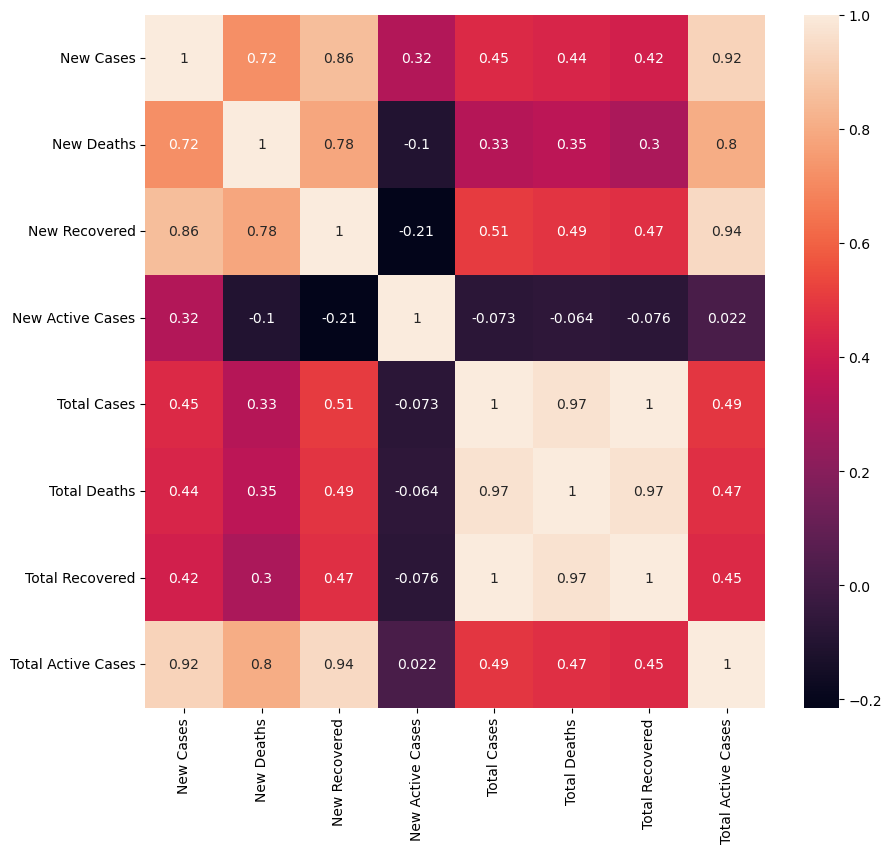

In [205]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [206]:
## Memsisahkan data yang diperlukan

data = data[['New Cases','New Deaths','New Recovered','Total Cases','Total Deaths','Total Recovered','Total Active Cases']]
data.tail()

,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Total Active Cases
31817,37,0,0,52770,1213,50997,560
31818,13,0,3,104640,2371,102066,203
31819,16,0,1,82198,3376,78510,312
31820,50,0,5,158866,3288,154924,654
31821,2358,27,2997,6405044,157876,6218708,28460


In [207]:
X = data[['New Cases', 'New Recovered', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases']]
y = data[['New Deaths']].values.reshape(-1, 1)

X_reshaped = X.values.reshape(-1, 1)  # Mengubah bentuk array X menjadi (-1, 1)

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Linear Regression

In [210]:
from sklearn.linear_model import LinearRegression

lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [211]:
print(lnr.intercept_)

[9.71708707]


In [212]:
coeff_df = pd.DataFrame(lnr.coef_[0],X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
New Cases,-8.871120
New Recovered,16.452989
Total Cases,-15.489830
Total Deaths,29.971928
Total Recovered,-19.230994
Total Active Cases,45.123659


In [213]:
pred = lnr.predict(X_test)

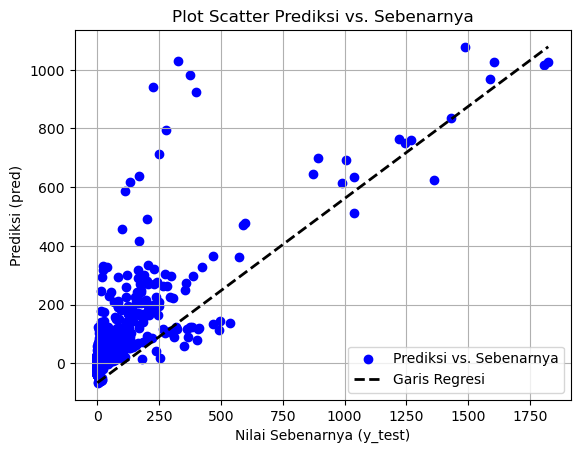

In [214]:
plt.scatter(y_test, pred, c='blue', label='Prediksi vs. Sebenarnya')

plt.plot([min(y_test), max(y_test)], [min(pred), max(pred)], 'k--', lw=2, label='Garis Regresi')

plt.xlabel('Nilai Sebenarnya (y_test)')
plt.ylabel('Prediksi (pred)')

plt.title('Plot Scatter Prediksi vs. Sebenarnya')

plt.legend()

plt.grid(True)

plt.show()

In [215]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

test_pred = lnr.predict(X_test)
train_pred = lnr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 7.966010950544881
MSE: 1408.2546280752956
RMSE: 37.52671885570727
R2 Square 0.6953122212554836
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.5081364684363265
MSE: 1298.4198131500857
RMSE: 36.033592842652894
R2 Square 0.6707935491723689
__________________________________


In [216]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.966011,1408.254628,37.526719,0.695312,-5.224727


# SVM

In [217]:
from sklearn.svm import SVR

svr = SVR(C=10, kernel='linear')
svr.fit(X_train, y_train)

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, kernel='linear')

In [218]:
print(svr.intercept_)

[7.88206757]


In [219]:
coeff_df = pd.DataFrame(svr.coef_[0],X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
New Cases,3.098044
New Recovered,14.364107
Total Cases,-2.211580
Total Deaths,4.679738
Total Recovered,-3.659950
Total Active Cases,25.983388


In [220]:
svr_pred = svr.predict(X_test)

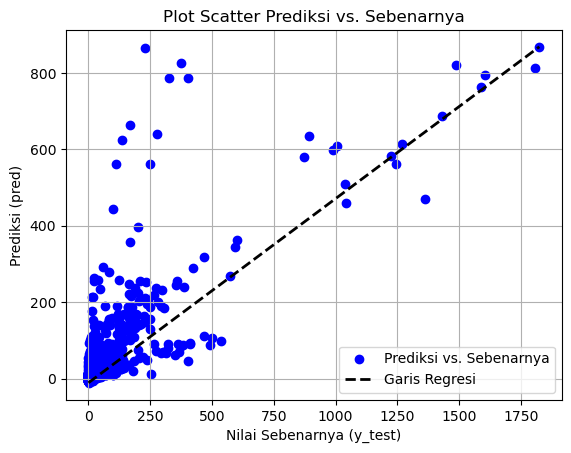

In [221]:
plt.scatter(y_test, svr_pred, c='blue', label='Prediksi vs. Sebenarnya')

plt.plot([min(y_test), max(y_test)], [min(svr_pred), max(svr_pred)], 'k--', lw=2, label='Garis Regresi')

plt.xlabel('Nilai Sebenarnya (y_test)')
plt.ylabel('Prediksi (pred)')

plt.title('Plot Scatter Prediksi vs. Sebenarnya')

plt.legend()

plt.grid(True)

plt.show()

In [222]:
svr_test_pred = svr.predict(X_test)
svr_train_pred = svr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, svr_test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, svr_train_pred)

Test set evaluation:
_____________________________________
MAE: 6.948260030124319
MSE: 1648.4671892122992
RMSE: 40.60132004273136
R2 Square 0.6433402055274787
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.481181279085381
MSE: 1446.5361186597304
RMSE: 38.03335534316859
R2 Square 0.6332395602754859
__________________________________


In [223]:
results_df_2 = pd.DataFrame(data=[["SVR", *evaluate(y_test, svr_test_pred) , cross_val(SVR())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array w

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.966011,1408.254628,37.526719,0.695312,-5.224727
1,SVR,6.948260,1648.467189,40.601320,0.643340,-0.678302


In [224]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model_lasso.fit(X_train, y_train)

lasso_test_pred = model_lasso.predict(X_test)
lasso_train_pred = model_lasso.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, lasso_test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, lasso_train_pred)

Test set evaluation:
_____________________________________
MAE: 7.2147411307527785
MSE: 1539.7994520984018
RMSE: 39.240278440632935
R2 Square 0.6668513879389142
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.723778679819113
MSE: 1387.3349723946633
RMSE: 37.24694581297456
R2 Square 0.6482496510407887
__________________________________


In [225]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, lasso_test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.637e+05, tolerance: 1.306e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.639e+05, tolerance: 1.301e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.966011,1408.254628,37.526719,0.695312,-5.224727
1,SVR,6.948260,1648.467189,40.601320,0.643340,-0.678302
2,Lasso Regression,7.214741,1539.799452,39.240278,0.666851,-5.223853


In [226]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

/tmp/wsuser/ipykernel_167/1071406687.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Test set evaluation:
_____________________________________
MAE: 3.0565407508776747
MSE: 179.11696193807987
RMSE: 13.383458519309569
R2 Square 0.9612465329917157
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0539874738999864
MSE: 19.181334585459535
RMSE: 4.379650052853485
R2 Square 0.9951366892147951
__________________________________


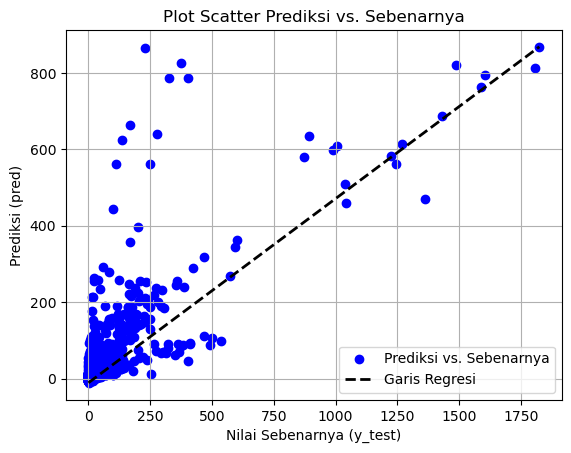

In [227]:
plt.scatter(y_test, svr_pred, c='blue', label='Prediksi vs. Sebenarnya')

plt.plot([min(y_test), max(y_test)], [min(svr_pred), max(svr_pred)], 'k--', lw=2, label='Garis Regresi')

plt.xlabel('Nilai Sebenarnya (y_test)')
plt.ylabel('Prediksi (pred)')

plt.title('Plot Scatter Prediksi vs. Sebenarnya')

plt.legend()

plt.grid(True)

plt.show()

In [228]:
results_df_2 = pd.DataFrame(data=[["RF Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/model_selection/_valida

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.966011,1408.254628,37.526719,0.695312,-5.224727
1,SVR,6.948260,1648.467189,40.601320,0.643340,-0.678302
2,Lasso Regression,7.214741,1539.799452,39.240278,0.666851,-5.223853
3,RF Regression,3.056541,179.116962,13.383459,0.961247,-2.210013


<AxesSubplot:ylabel='Model'>

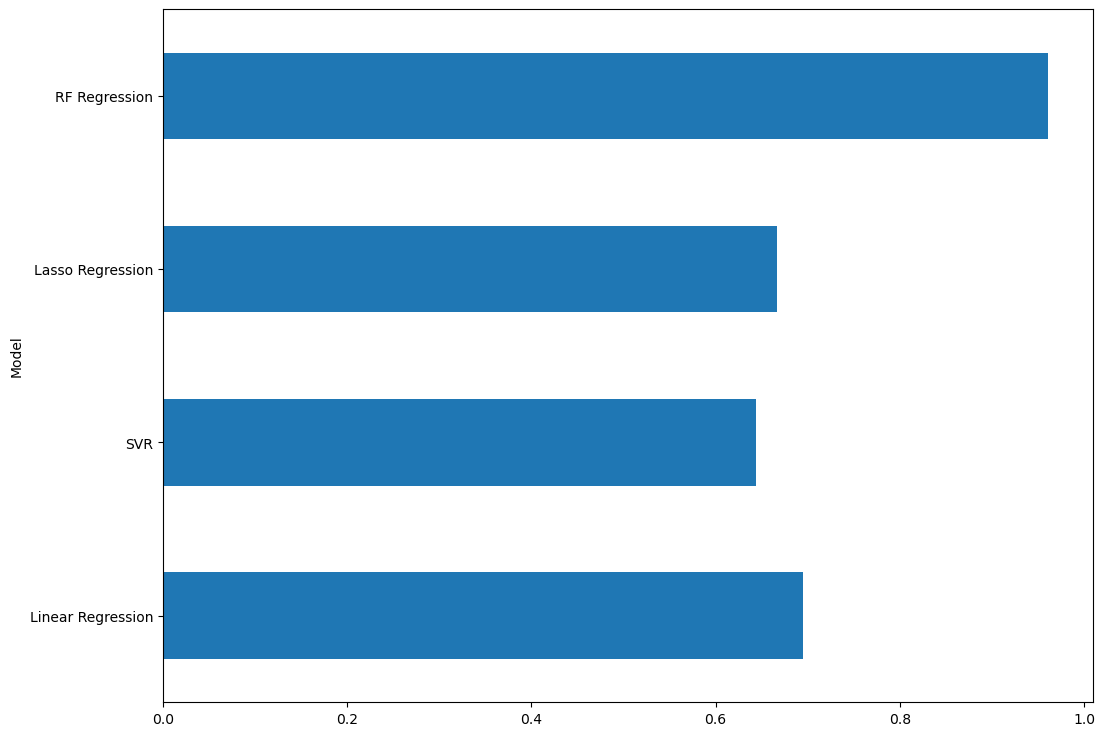

In [229]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12,9))